##menggambarkan model 3D

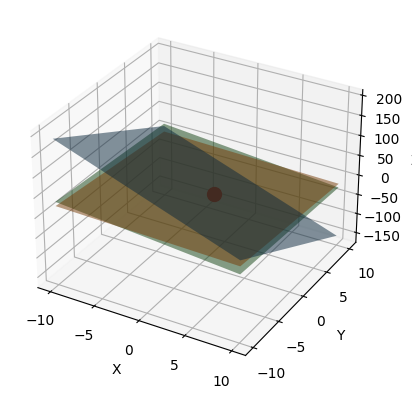

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Persamaan sistem
def eq1(x, y):
    return (19 - 8*x - 9*y) / 1

def eq2(x, y):
    return (9 - x - 3*y) / 2

def eq3(x, y):
    return (5 - 2*x - y) / 1

# Membuat grid
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)

# Menghitung nilai z untuk setiap titik
Z1 = eq1(X, Y)
Z2 = eq2(X, Y)
Z3 = eq3(X, Y)

# Membuat plot 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plotting permukaan untuk setiap persamaan
ax.plot_surface(X, Y, Z1, alpha=0.5, rstride=100, cstride=100)
ax.plot_surface(X, Y, Z2, alpha=0.5, rstride=100, cstride=100)
ax.plot_surface(X, Y, Z3, alpha=0.5, rstride=100, cstride=100)

# Plotting titik potong
intersection = np.linalg.solve([[8, 9, 1], [1, 2, 3], [2, 1, 1]], [19, 9, 5])
ax.scatter(intersection[0], intersection[1], intersection[2], color='r', s=100)

# Label sumbu
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

penyelesaian sistem persamaan linier dengan menggunakan eliminasi gauss

selesaikan persamaan berikut:
$$
8x_1+9x_2+x_3=19\\
x_1+2x_2+3x_3=9\\
2x_1+x_2+x_3=5\
$$

In [1]:
import numpy as np
A=np.array([[8,9,1,19],[1,2,3,9],[2,1,1,5]])
print(A)

[[ 8  9  1 19]
 [ 1  2  3  9]
 [ 2  1  1  5]]


###mendefinisikan fungsi operasi baris eliminasi gauss

*  RowSwap() : Digunakan untuk menukar baris yang kita inginkan dari matriks ke baris 1
*  RowScale() : Digunakan untuk mengalikan baris matriks dengan angka yang kita inginkan
*  RowAdd() : Digunakan untuk mengalikan baris matriks dengan angka yang telah ditentukan lalu hasil kali akan dijumlahkan ke baris lain

In [2]:
def RowSwap(A,k,l):
# =============================================================================
#     A is a NumPy array.  RowSwap will return duplicate array with rows
#     k and l swapped.
# =============================================================================
    m = A.shape[0]  # m is number of rows in A
    n = A.shape[1]  # n is number of columns in A

    B = np.copy(A).astype('float64')

    for j in range(n):
        temp = B[k][j]
        B[k][j] = B[l][j]
        B[l][j] = temp

    return B

def RowScale(A,k,scale):
# =============================================================================
#     A is a NumPy array.  RowScale will return duplicate array with the
#     entries of row k multiplied by scale.
# =============================================================================
    m = A.shape[0]  # m is number of rows in A
    n = A.shape[1]  # n is number of columns in A

    B = np.copy(A).astype('float64')

    for j in range(n):
        B[k][j] *= scale

    return B

def RowAdd(A,k,l,scale):
# =============================================================================
#     A is a numpy array.  RowAdd will return duplicate array with row
#     l modifed.  The new values will be the old values of row l added to
#     the values of row k, multiplied by scale.
# =============================================================================
    m = A.shape[0]  # m is number of rows in A
    n = A.shape[1]  # n is number of columns in A

    B = np.copy(A).astype('float64')

    for j in range(n):
        B[l][j] += B[k][j]*scale

    return B

###Berikut langkah penyelesaiannya

In [3]:
A1 = RowScale(A,2,4)
print(A1)

[[ 8.  9.  1. 19.]
 [ 1.  2.  3.  9.]
 [ 8.  4.  4. 20.]]


In [4]:
A2 = RowScale(A1,1,2)
print(A2)

[[ 8.  9.  1. 19.]
 [ 2.  4.  6. 18.]
 [ 8.  4.  4. 20.]]


In [5]:
A3 = RowScale(A2,1,4)
print(A3)

[[ 8.  9.  1. 19.]
 [ 8. 16. 24. 72.]
 [ 8.  4.  4. 20.]]


In [6]:
A4 = RowAdd(A3,2,1,-1)
print(A4)

[[ 8.  9.  1. 19.]
 [ 0. 12. 20. 52.]
 [ 8.  4.  4. 20.]]


In [7]:
A5 = RowAdd(A4,2,0,-1)
print(A5)

[[ 0.  5. -3. -1.]
 [ 0. 12. 20. 52.]
 [ 8.  4.  4. 20.]]


In [8]:
A6 = RowScale(A5,2,1/4)
print(A6)

[[ 0.  5. -3. -1.]
 [ 0. 12. 20. 52.]
 [ 2.  1.  1.  5.]]


In [9]:
A7 = RowAdd(A6,1,0,1/3)
print(A7)

[[ 0.          9.          3.66666667 16.33333333]
 [ 0.         12.         20.         52.        ]
 [ 2.          1.          1.          5.        ]]


In [10]:
A8 = RowScale(A7,1,1/4)
print(A8)

[[ 0.          9.          3.66666667 16.33333333]
 [ 0.          3.          5.         13.        ]
 [ 2.          1.          1.          5.        ]]


In [11]:
A9 = RowAdd(A8,1,0,-3)
print(A9)

[[  0.           0.         -11.33333333 -22.66666667]
 [  0.           3.           5.          13.        ]
 [  2.           1.           1.           5.        ]]


In [12]:
A10 = RowScale(A9,0,3)
print(A10)

[[  0.   0. -34. -68.]
 [  0.   3.   5.  13.]
 [  2.   1.   1.   5.]]


In [13]:
A11 = RowSwap(A10,2,1)
print(A11)

[[  0.   0. -34. -68.]
 [  2.   1.   1.   5.]
 [  0.   3.   5.  13.]]


In [14]:
A12 = RowSwap(A11,0,1)
print(A12)

[[  2.   1.   1.   5.]
 [  0.   0. -34. -68.]
 [  0.   3.   5.  13.]]


In [15]:
A13 = RowSwap(A12,2,1)
print(A13)

[[  2.   1.   1.   5.]
 [  0.   3.   5.  13.]
 [  0.   0. -34. -68.]]


$$
2x_1+x_2+x_3=5\\
3x_2+5x_3=13\\
(-34)x_3=-68\
$$

$$
x_1=1\\
x_2=1\\
x_3=2\
$$